In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:38<00:00, 23.3MB/s]
100% 812M/812M [00:38<00:00, 22.1MB/s]


In [ ]:
# Extracting the compresed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Data set is extracted")

The Data set is extracted


In [ ]:
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The Data set is extracted")

The Data set is extracted


In [ ]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/drive/MyDrive/dataset/data/trail_ensemble'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  1000


In [ ]:
names = os.listdir('/content/drive/MyDrive/dataset/data/trail_ensemble')
print(names)

['cat.0.jpg', 'cat.10.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.110.jpg', 'cat.11.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.130.jpg', 'cat.13.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.140.jpg', 'cat.14.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.150.jpg', 'cat.15.jpg', 'cat.152.jpg', 'cat.151.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.156.jpg', 'cat.155.jpg', 'cat.158.jpg', 'cat.157.jpg', 'cat

In [ ]:
dog_count = 0
cat_count = 0
for i in names:
  name = i[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1

print("Dog Images: ", dog_count)
print("Cat Images: ", cat_count)

Dog Images:  500
Cat Images:  500


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

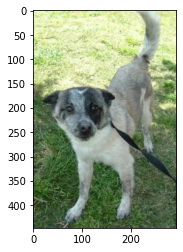

In [ ]:
#Displaying the image of dog
dog_img = mpimg.imread('/content/drive/MyDrive/dataset/data/trail_ensemble/dog.195.jpg')
plt.imshow(dog_img)

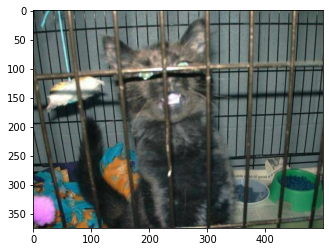

In [ ]:
#Displaying the image of cat
import cv2
cat_img = cv2.imread('/content/drive/MyDrive/dataset/data/trail_ensemble/cat.195.jpg')
plt.imshow(cat_img)

In [ ]:
 # Creating a new directory for resized images

os.mkdir('/content/resized_image')

In [ ]:
original_folder = '/content/drive/MyDrive/dataset/data/trail_ensemble/'
resized_folder = '/content/resized_image/'

for i in range(1000):
  filename = os.listdir(original_folder)[i]
  image_path = original_folder + filename

  image = Image.open(image_path)
  image = image.resize((224, 224))
  image = image.convert('RGB')

  new_image_path = resized_folder + filename
  image.save(new_image_path)

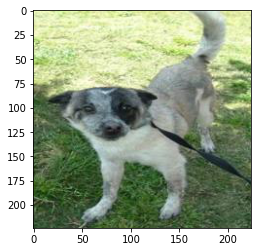

In [ ]:
#Displaying the Resized image of dog
img = mpimg.imread('/content/resized_image/dog.195.jpg')
plt.imshow(img)

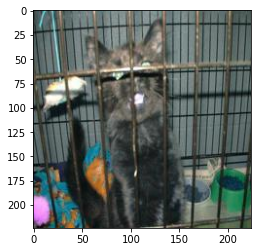

In [ ]:
#Displaying the image of cat
import cv2
img = cv2.imread('/content/resized_image/cat.195.jpg')
plt.imshow(img)

DOG --> 1

CAT --> 0

In [ ]:
# Creating lables for the Cats and Dogs
#Creating for loop to assign lables

file_names = os.listdir('/content/resized_image/')

labels = []

for i in range(1000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(file_names[0:10])
print(len(file_names))

['dog.107.jpg', 'cat.13.jpg', 'cat.476.jpg', 'dog.247.jpg', 'dog.495.jpg', 'dog.322.jpg', 'cat.161.jpg', 'cat.197.jpg', 'dog.403.jpg', 'cat.381.jpg']
1000


In [ ]:
print(labels[0:10])
print(len(labels))

[1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
1000


In [ ]:
# Now we will count how many dog images and Cat images

values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[500 500]


**Converting the resized images to numpy**

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/resized_image/'
image_extension = ['jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

array_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(array_images)

[[[[  0  17  24]
   [  0  17  24]
   [  1  21  26]
   ...
   [  3  36  55]
   [  6  40  63]
   [  8  42  65]]

  [[  0  16  23]
   [  0  19  24]
   [  6  26  31]
   ...
   [  1  39  57]
   [  2  39  59]
   [  0  39  61]]

  [[ 18  34  40]
   [ 17  36  39]
   [ 23  44  46]
   ...
   [  0  43  60]
   [  0  40  59]
   [  0  39  57]]

  ...

  [[ 17  38  16]
   [ 18  34  16]
   [ 26  34  23]
   ...
   [  4   6   6]
   [  3   5   5]
   [  3   5   5]]

  [[ 11  35  11]
   [ 17  36  17]
   [ 28  38  26]
   ...
   [  5   7   7]
   [  4   6   6]
   [  4   6   6]]

  [[  7  33   9]
   [ 17  37  18]
   [ 30  40  28]
   ...
   [  5   7   7]
   [  5   7   7]
   [  4   6   6]]]


 [[[ 22  82  94]
   [ 23  83  95]
   [ 26  86  98]
   ...
   [133 184 177]
   [132 183 176]
   [132 183 176]]

  [[ 25  85  97]
   [ 26  86  98]
   [ 29  89 101]
   ...
   [132 183 176]
   [132 183 176]
   [131 182 175]]

  [[ 29  89 101]
   [ 30  90 102]
   [ 33  93 105]
   ...
   [131 182 175]
   [131 182 175]
   [131 182

In [ ]:
type(array_images)

numpy.ndarray

In [ ]:
print(array_images.shape)

(1000, 224, 224, 3)


In [ ]:
X = array_images
Y = np.array(labels)

**Train and Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
# Scalling

X_train_scale = X_train/255

X_test_scale = X_test/255

##**CNN Model 1**

In [ ]:
from google.colab import drive
import os
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [ ]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

In [ ]:
from keras.layers import BatchNormalization
model_1 = Sequential([
	Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
	MaxPool2D(2, 2),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPool2D(2, 2),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPool2D(2, 2),
	Conv2D(64, (3, 3), activation='relu'),
	MaxPool2D(2, 2),

	Flatten(),
	Dense(512, activation='relu'),
	BatchNormalization(),
	Dense(256, activation='relu'),
	Dropout(0.1),
	BatchNormalization(),
	Dense(128, activation='relu'),
	Dropout(0.2),
	BatchNormalization(),
	Dense(2)
])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.0001)
model_1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model_1.fit(X_train_scale,Y_train, batch_size = 8, validation_data=(X_test_scale, Y_test), epochs=15)

Epoch 1/15
100/100 [==============================] - 116s 1s/step - loss: 5.7411 - accuracy: 0.4988 - val_loss: 3.8087 - val_accuracy: 0.5200
Epoch 2/15
100/100 [==============================] - 98s 982ms/step - loss: 6.4021 - accuracy: 0.4300 - val_loss: 7.0140 - val_accuracy: 0.5000
Epoch 3/15
100/100 [==============================] - 91s 909ms/step - loss: 6.4698 - accuracy: 0.4462 - val_loss: 7.0334 - val_accuracy: 0.4100
Epoch 4/15
100/100 [==============================] - 95s 954ms/step - loss: 6.4982 - accuracy: 0.4263 - val_loss: 6.4791 - val_accuracy: 0.4400
Epoch 5/15
100/100 [==============================] - 96s 959ms/step - loss: 6.5908 - accuracy: 0.4300 - val_loss: 7.2694 - val_accuracy: 0.4700
Epoch 6/15
100/100 [==============================] - 96s 952ms/step - loss: 6.0991 - accuracy: 0.4863 - val_loss: 7.4167 - val_accuracy: 0.4800
Epoch 7/15
100/100 [==============================] - 93s 936ms/step - loss: 6.0564 - accuracy: 0.4825 - val_loss: 6.5852 - val_accu

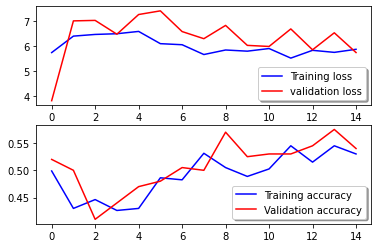

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
score, acc = model_1.evaluate(X_test_scale, Y_test)
print("Test Loss = ", score)
print("Test Accuracy = ", acc)

7/7 [==============================] - 5s 695ms/step - loss: 5.7430 - accuracy: 0.5400
Test Loss =  5.74302864074707
Test Accuracy =  0.5400000214576721


In [ ]:
model_1.save('Simple_CNN.h5')
simple_cnn = 'Simple_CNN.h5'

In [ ]:
cnn_reloaded_model_1 = tf.keras.models.load_model(
       (simple_cnn),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
cnn_reloaded_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

##**CNN Model 2**

In [ ]:
model_2 = Sequential([
    Conv2D(16,(3,3),activation = "relu" , input_shape = (224,224,3)) ,
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation = "relu") ,
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation = "relu") ,
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation = "relu"),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512,activation="relu"),
    Dropout(0.1,seed = 2019),
    Dense(256,activation ="relu"),
    Dropout(0.3,seed = 2019),
    Dense(128,activation="relu"),
    Dropout(0.4,seed = 2019),
    Dense(64,activation ="relu"),
    Dropout(0.2,seed = 2019),
    Dense(2)
])

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 64)      

In [ ]:
from keras.optimizers import RMSprop

optimizer = RMSprop(lr=0.0001)
model_2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model_2.fit(X_train_scale,Y_train, batch_size = 8, validation_data=(X_test_scale, Y_test), epochs=15)

Epoch 1/15
100/100 [==============================] - 66s 624ms/step - loss: 1.3415 - accuracy: 0.5050 - val_loss: 0.6774 - val_accuracy: 0.4800
Epoch 2/15
100/100 [==============================] - 62s 624ms/step - loss: 0.9080 - accuracy: 0.4925 - val_loss: 0.6586 - val_accuracy: 0.4800
Epoch 3/15
100/100 [==============================] - 60s 601ms/step - loss: 0.7788 - accuracy: 0.4837 - val_loss: 0.6756 - val_accuracy: 0.4850
Epoch 4/15
100/100 [==============================] - 58s 579ms/step - loss: 0.7823 - accuracy: 0.5288 - val_loss: 0.6342 - val_accuracy: 0.4750
Epoch 5/15
100/100 [==============================] - 58s 580ms/step - loss: 0.7423 - accuracy: 0.4837 - val_loss: 0.6320 - val_accuracy: 0.4800
Epoch 6/15
100/100 [==============================] - 60s 602ms/step - loss: 0.6983 - accuracy: 0.5138 - val_loss: 0.7336 - val_accuracy: 0.4800
Epoch 7/15
100/100 [==============================] - 62s 623ms/step - loss: 0.7113 - accuracy: 0.5325 - val_loss: 0.7020 - val_ac

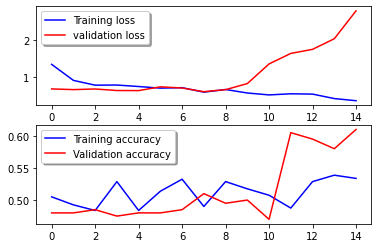

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
score, acc = model_2.evaluate(X_test_scale, Y_test)
print("Test Loss = ", score)
print("Test Accuracy = ", acc)

7/7 [==============================] - 5s 570ms/step - loss: 2.7882 - accuracy: 0.6100
Test Loss =  2.7882192134857178
Test Accuracy =  0.6100000143051147


In [ ]:
model_2.save('Simple_CNN_2.h5')
simple_cnn_2 = 'Simple_CNN_2.h5'

In [ ]:
cnn_reloaded_model_2 = tf.keras.models.load_model(
       (simple_cnn_2),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

In [ ]:
cnn_reloaded_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 64)      

##**Neural Network (Mobile Net)**

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224, 224, 3), trainable=False)

In [ ]:
num_of_classes = 2

model_pre = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model_pre.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model_pre.compile(
    optimizer = 'RMSprop',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [ ]:
model_pre.compile(optimizer='RMSprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics=['accuracy'])

In [ ]:
history = model_pre.fit(X_train_scale,Y_train, batch_size = 8, validation_data=(X_test_scale, Y_test), epochs=15)

Epoch 1/15
100/100 [==============================] - 41s 356ms/step - loss: 0.1604 - accuracy: 0.9337 - val_loss: 0.0541 - val_accuracy: 0.9850
Epoch 2/15
100/100 [==============================] - 33s 336ms/step - loss: 0.0638 - accuracy: 0.9812 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 3/15
100/100 [==============================] - 30s 304ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0343 - val_accuracy: 0.9850
Epoch 4/15
100/100 [==============================] - 29s 291ms/step - loss: 0.0331 - accuracy: 0.9912 - val_loss: 0.0271 - val_accuracy: 0.9950
Epoch 5/15
100/100 [==============================] - 30s 299ms/step - loss: 0.0228 - accuracy: 0.9962 - val_loss: 0.0238 - val_accuracy: 0.9900
Epoch 6/15
100/100 [==============================] - 29s 296ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0289 - val_accuracy: 0.9900
Epoch 7/15
100/100 [==============================] - 35s 346ms/step - loss: 0.0140 - accuracy: 0.9975 - val_loss: 0.0236 - val_ac

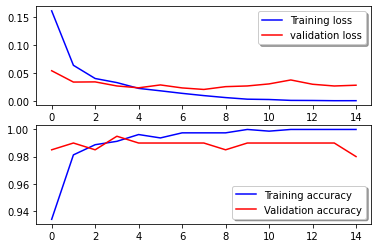

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
score, acc = model_pre.evaluate(X_test_scale, Y_test)
print("Test Loss = ", score)
print("Test Accuracy = ", acc)

7/7 [==============================] - 9s 1s/step - loss: 0.0284 - accuracy: 0.9800
Test Loss =  0.028414351865649223
Test Accuracy =  0.9800000190734863


In [ ]:
model_pre.save('Mobile_Net.h5')
mobile_net = 'Mobile_Net.h5'

In [ ]:
mn_reloaded_model = tf.keras.models.load_model((mobile_net), custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
mn_reloaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

model_cnn = load_model('/content/drive/MyDrive/dataset/data/Simple_CNN.h5')
model_cnn = Model(inputs=model_cnn.inputs, outputs = model_cnn.outputs, name = 'name_of_model_cnn')

model_cnn_2 = load_model('/content/drive/MyDrive/dataset/data/Simple_CNN_2.h5')
model_cnn_2 = Model(inputs=model_cnn_2.inputs, outputs = model_cnn_2.outputs, name = 'name_of_model_cnn_2')


# model_mn = load_model('/content/drive/MyDrive/dataset/data/Mobile_Net.h5')
# model_mn = Model(inputs=model_mn.inputs, outputs = model_mn.outputs, name = 'name_of_model_mn')

list_of_models = [model_cnn, model_cnn_2]
model_input = Input(shape=(224, 224, 3))
model_output = [model(model_input) for model in list_of_models]
ensembled_output = Average()(model_output)
ensembled_model = Model(inputs = model_input, outputs = ensembled_output, name = 'ensemble')

In [ ]:
ensembled_model.compile(optimizer='Adam', loss = tf.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scale,Y_train, batch_size = 8, validation_data=(X_test_scale, Y_test), epochs=15)

Epoch 1/15
100/100 [==============================] - 58s 583ms/step - loss: 0.3555 - accuracy: 0.5775 - val_loss: 2.4786 - val_accuracy: 0.6450
Epoch 2/15
100/100 [==============================] - 63s 632ms/step - loss: 0.2438 - accuracy: 0.5888 - val_loss: 2.6899 - val_accuracy: 0.6550
Epoch 3/15
100/100 [==============================] - 59s 590ms/step - loss: 0.1619 - accuracy: 0.5475 - val_loss: 2.9188 - val_accuracy: 0.6900
Epoch 4/15
100/100 [==============================] - 58s 584ms/step - loss: 0.2082 - accuracy: 0.5587 - val_loss: 2.9432 - val_accuracy: 0.6350
Epoch 5/15
100/100 [==============================] - 58s 581ms/step - loss: 0.0984 - accuracy: 0.5650 - val_loss: 3.2387 - val_accuracy: 0.6100
Epoch 6/15
100/100 [==============================] - 61s 610ms/step - loss: 0.1105 - accuracy: 0.6025 - val_loss: 3.7607 - val_accuracy: 0.6100
Epoch 7/15
100/100 [==============================] - 60s 595ms/step - loss: 0.0582 - accuracy: 0.5900 - val_loss: 3.8048 - val_ac

**Predictive System**

path of the image to be predicted: /content/download_dog.jpeg


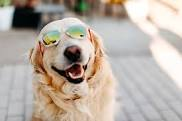

1/1 [==============================] - 0s 25ms/step
[[-7.840499   6.8401303]]
The Image Represents Dog


In [ ]:
# MOBILENET MODEL
input_image_path = input("path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])
input_prediction = model_pre.predict(image_reshaped)
print(input_prediction)
input_predict_label = np.argmax(input_prediction)
# print(input_predict_label)

if input_predict_label == 0:
  print("The Image Represents Cat")
elif input_predict_label == 1:
  print("The Image Represents Dog")
else:
  print("Can't classify")